,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.034777,0.021095,0.022859,0.057108,-0.027721,0.049833,-0.062453,0.021530,0.002487,0.015263,...,-0.026397,-0.000946,-0.006854,-0.013282,0.060880,0.014963,0.024955,-0.028431,0.063067,-0.019172
1,0.055678,0.006809,0.045476,0.048367,-0.014556,0.001065,0.050299,-0.016680,-0.019574,0.008711,...,0.042041,0.015126,0.001924,-0.014677,-0.001810,-0.000482,0.038532,-0.024461,-0.057528,-0.001524
2,-0.015907,-0.036239,0.051001,-0.038650,-0.046078,-0.022336,0.023442,-0.019176,0.073939,0.060610,...,-0.020788,-0.011074,0.020088,0.013070,0.075852,-0.037847,0.040169,0.032250,0.034800,0.029136
3,-0.030013,-0.000367,0.026493,0.041921,0.049328,-0.003332,0.033143,-0.015888,-0.036116,-0.003439,...,-0.054726,0.000775,0.017166,-0.058399,0.067619,-0.013521,-0.045691,0.043442,0.046574,0.010113
4,0.028172,-0.024817,-0.007142,-0.048809,0.041005,-0.031441,-0.010563,0.013832,-0.064122,0.045967,...,-0.007023,-0.010395,0.019639,0.044675,-0.067793,0.005963,-0.025229,-0.005420,-0.009263,-0.021623
5,-0.047904,0.007830,0.023033,-0.052438,-0.022473,-0.051197,0.056768,0.021941,0.042415,-0.015144,...,0.042622,0.024458,-0.000341,0.017103,0.045010,-0.011755,-0.030351,0.009703,0.036112,0.014645
6,-0.058833,0.000364,0.038346,-0.055482,0.009592,-0.053051,0.035101,0.025246,-0.029427,0.011299,...,0.028599,-0.030949,-0.025464,0.073754,-0.025699,-0.002828,-0.032180,-0.033248,0.005129,0.026994
7,0.018448,0.009481,0.003779,0.056426,-0.016370,-0.022006,-0.009280,0.026612,-0.032759,-0.060649,...,-0.058867,-0.023036,0.015289,-0.028513,-0.034096,0.010017,-0.025551,0.012059,0.023172,0.013441
8,0.027701,0.043701,0.018512,0.006685,0.038423,0.018258,0.015091,0.014176,-0.045748,0.002669,...,-0.030450,0.019047,0.004250,-0.062452,0.074015,-0.043788,0.006737,0.024229,-0.027138,0.007556
9,-0.018183,-0.043285,0.045173,0.035726,-0.000297,0.028255,-0.004307,0.013470,-0.037653,-0.050657,...,-0.004025,0.000652,0.014118,0.078167,0.001302,-0.032191,-0.016542,0.021038,0.025602,0.002261


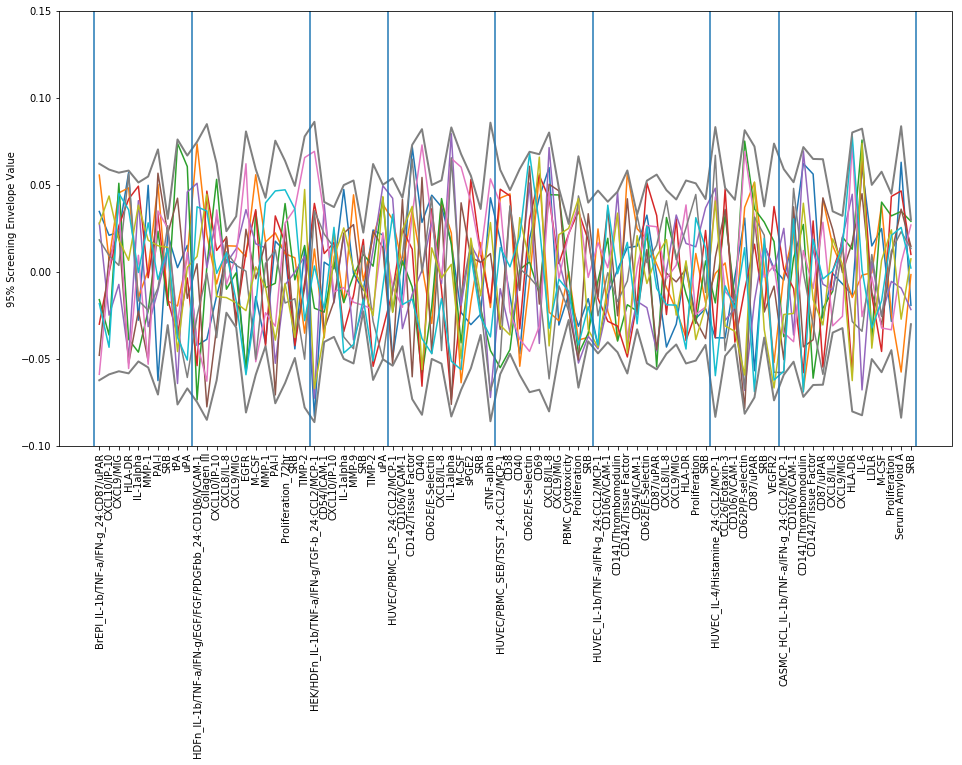

In [76]:
import xml.etree.ElementTree as ET
import pandas as pd
# https://github.com/martinblech/xmltodict
# conda install -c conda-forge xmltodict
import numpy as np
import pandas as pd
import xmltodict as x2d
from numpy.random import rand
    
import matplotlib.pyplot as plt
%matplotlib inline


# Read in XML file containg Significance envelope    
xml_data = ""
sig_env_path = '/Users/aberenyi/SigEnvelopeFile.xml'
with open(sig_env_path) as f:
    xml_data = f.read()

# parse xml string as a dictionary
envelope_dict = x2d.parse(xml_data)

# indexes in xml to select profile type/confidence
SCREENING = 0
TRUSTED = 1
PROFILE = 2
_99 = 0
_95 = 1

# Get confidence Screening envelope as a list of dictionaries
ENVELOPE = SCREENING
CONFIDENCE = _95
value_list =  envelope_dict['java']['object']['void'][ENVELOPE]['object'][1]['void'][CONFIDENCE]['object']['void']

# populate values from value_list into a dict, "system:marker':value
screen_envelope_95 = {}
for item in value_list:
    screen_envelope_95[item['string']] = item['float']

    
# print(screen_envelope_95)
# get one value
# print(screen_envelope_95['3T3_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1'])

#####################################
# now generate random weak profiles #
#####################################

# read SVM published profiles, and get system:marker values from there
data = pd.read_excel('SVMData.xlsx')

# sequence of system-markers in profile is the column names:
system_markers = data.columns.values[1:]

## Generate random Profiles
random_profiles = []
plt.figure(figsize=(16,8))
for rp in range(10):
    random_profile = [float(screen_envelope_95[sm])*(rand()*2-1) for sm in system_markers]
    random_profiles.append(random_profile)
    
rp_df = pd.DataFrame(random_profiles)

display(rp_df)

## Plot Random Profiles
x = range(len(random_profile));
for rp in range(10):
    # plt.scatter(x, random_profiles[rp], s=np.abs(5000*np.power(random_profiles[rp],2))) # plot controlling size
    plt.plot(x, random_profiles[rp]) # plot controlling size
    

## Plot envelope
envelope_values = np.array([float(screen_envelope_95[sm]) for sm in system_markers])
plt.plot(x, envelope_values, 
         x, -envelope_values, c='gray', linewidth=2)


x_labels = []
last_sys = ""
systems = []
v_line_positions = []

for i, sm in enumerate(system_markers):
    s,m = sm.split(':')
    #x_labels.append(m)
    if (last_sys != s):
        x_labels.append("{}:{}".format(s,m))            
        last_sys = s
        systems.append(s)
        v_line_positions.append(i)
    else:
        x_labels.append(m)
            
    
v_line_positions.append(len(system_markers))


plt.xticks(x, x_labels, rotation='vertical');
plt.ylabel('95% Screening Envelope Value');
plt.ylim(-0.1,0.15)

# add vertical lines
for lp in v_line_positions:
    plt.axvline(x=lp-0.5)

# Label Sysytems
for i, sys in enumerate(systems):
    None
    #t = plt.text(v_line_positions[i], 0.1, sys)
    




In [43]:
#print(system_markers)